In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Daily Household Transactions.csv")

In [3]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [4]:
df.describe()

,Amount
count,599.000000
mean,2026.219983
std,8478.642674
min,2.000000
25%,36.000000
50%,77.000000
75%,489.680000
max,70255.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            599 non-null    object 
 1   Mode            599 non-null    object 
 2   Category        599 non-null    object 
 3   Subcategory     489 non-null    object 
 4   Note            495 non-null    object 
 5   Amount          599 non-null    float64
 6   Income/Expense  599 non-null    object 
 7   Currency        599 non-null    object 
dtypes: float64(1), object(7)
memory usage: 37.6+ KB


In [6]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       110
Note              104
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [7]:
df.count()


Date              599
Mode              599
Category          599
Subcategory       489
Note              495
Amount            599
Income/Expense    599
Currency          599
dtype: int64

In [8]:
df.isnull()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
594,False,False,False,False,False,False,False,False
595,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,False


In [9]:
df.dropna(inplace = True)

In [10]:
df.count()

Date              445
Mode              445
Category          445
Subcategory       445
Note              445
Amount            445
Income/Expense    445
Currency          445
dtype: int64

In [11]:
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [12]:
df

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
...,...,...,...,...,...,...,...,...
594,23/01/2018 21:28:59,Credit Card,Household,Kirana,Smart point,273.0,Expense,INR
595,22/01/2018 19:05:26,Saving Bank account 1,Food,flour mill,2 kg Bajari,14.0,Expense,INR
596,22/01/2018 12:08:08,Cash,Food,flour mill,M D sure 3kg atta,162.0,Expense,INR
597,22/01/2018 10:25:23,Saving Bank account 1,Health,Medicine,Cough-sills 4 pcs + sinarest 3 pcs,30.0,Expense,INR


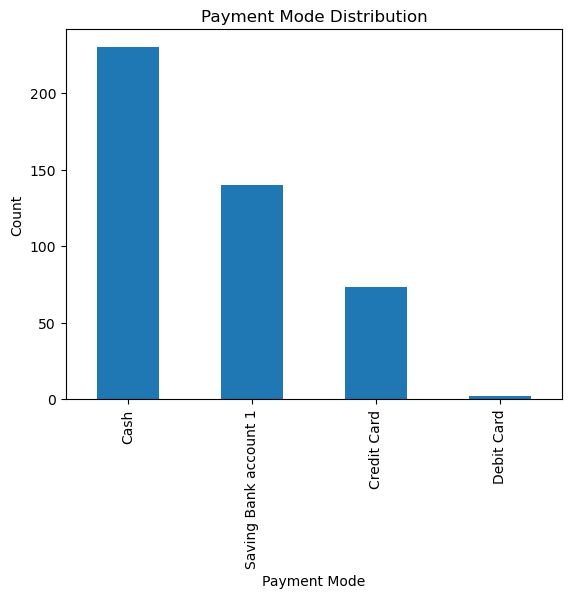

In [13]:
payment_mode_counts = df["Mode"].value_counts()
payment_mode_counts.plot(kind='bar')
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.show()

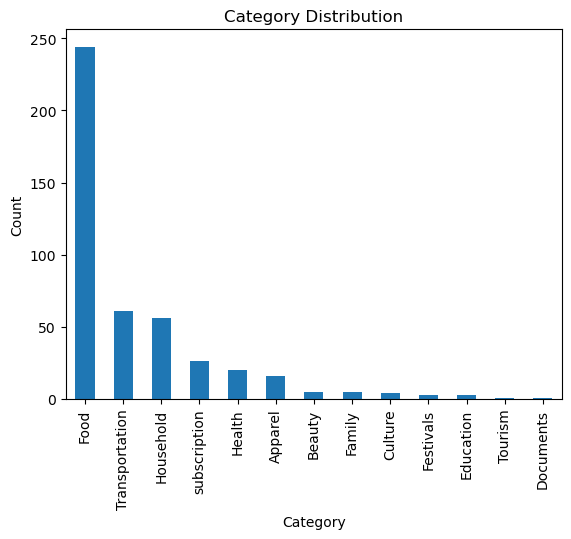

In [14]:
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

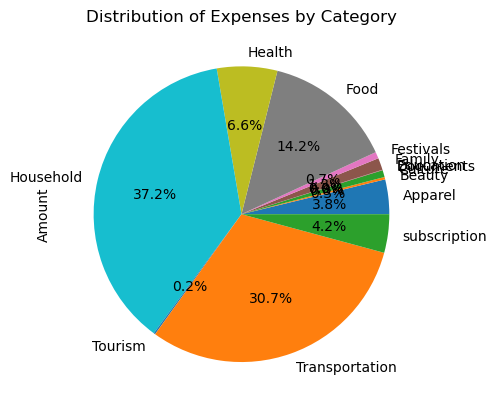

In [15]:
# Step 1: Calculate the sum for each category
category_sums = df.groupby('Category')['Amount'].sum()

# Step 2: Replace categories with sums less than 5 with "Others"
df['Category'] = df['Category'].apply(lambda x: 'Others' if category_sums[x] < 5 else x)

# Step 3: Recalculate the sum for each category (including 'Others')
category_sums_final = df.groupby('Category')['Amount'].sum()

# Step 4: Plot the pie chart
category_sums_final.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Expenses by Category')
plt.show()


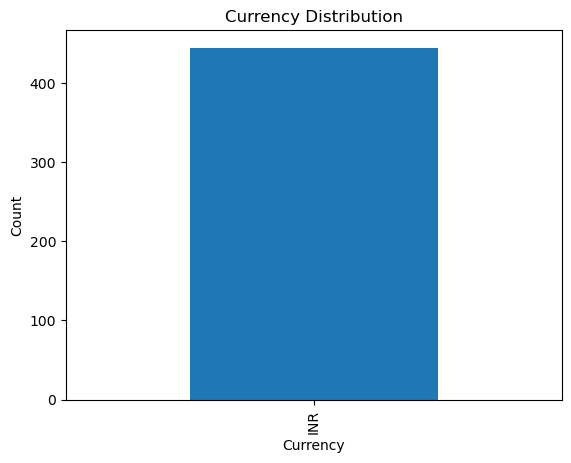

In [22]:
curr_count = df['Currency'].value_counts()
curr_count.plot(kind='bar')
plt.title('Currency Distribution')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler
selected_columns = ['Amount', 'Category', 'Subcategory']
data_selected = df[selected_columns]


In [24]:
data_encoded = pd.get_dummies(data_selected, columns=['Category', 'Subcategory'])


In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


In [26]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled_df.head()

,Amount,Category_Apparel,Category_Beauty,Category_Culture,Category_Documents,Category_Education,Category_Family,Category_Festivals,Category_Food,Category_Health,...,Subcategory_flour mill,Subcategory_fruits,Subcategory_gadgets,Subcategory_grooming,Subcategory_home decor,Subcategory_makeup,Subcategory_misc,Subcategory_snacks,Subcategory_train,Subcategory_vegetables
0,-0.154891,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385
1,-0.142333,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,0.907618,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,3.226493,-0.095238,-0.082385
2,-0.084149,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385
3,-0.159495,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,-0.082385,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385
4,-0.062383,-0.193122,-0.1066,-0.095238,-0.047458,-0.082385,-0.1066,12.138094,-1.101785,-0.21693,...,-0.135302,-0.095238,-0.067191,-0.1066,-0.082385,-0.047458,-0.047458,-0.309934,-0.095238,-0.082385


C:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.wa

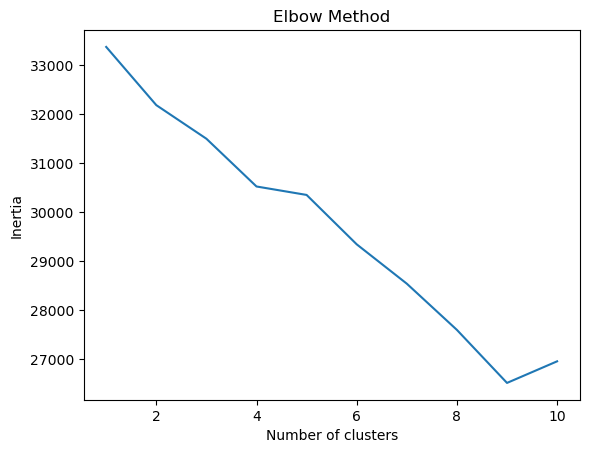

In [28]:
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [29]:
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(data_scaled_df)

df['Cluster'] = kmeans.labels_
print(df.head())

C:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  Cluster  
0        Expense      INR        4  
1        Expense      INR        1  
2        Expense      INR        1  
3        Expense      INR        1  
4        Expense     

In [31]:
for cluster in range(optimal_clusters):
    print(f'Cluster {cluster}')
    print(df[df['Cluster'] == cluster].head())

Cluster 0
                    Date                   Mode   Category Subcategory  \
137  16/07/2018 10:43:53            Credit Card  Household    Hardware   
197  29/06/2018 16:13:02                   Cash  Household    Hardware   
219  26/06/2018 12:49:54  Saving Bank account 1  Household    Hardware   
384             2/4/2018            Credit Card  Household    Hardware   
454            10/3/2018                   Cash  Household    Hardware   

                                Note  Amount Income/Expense Currency  Cluster  
137  Sony WI-C100 earphones wireless  1190.0        Expense      INR        0  
197                 Tulsi plant+ pot    70.0        Expense      INR        0  
219           Umbrella handle repair    70.0        Expense      INR        0  
384                   Window cleaner   149.0        Expense      INR        0  
454                  Mosquito Racket   300.0        Expense      INR        0  
Cluster 1
                  Date                   Mode      Cate

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example data preparation
data = pd.DataFrame() # Your data here
data_scaled_df = StandardScaler().fit_transform(data)  # Scaling the data

# Initialize KMeans with the optimal number of clusters
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(data_scaled_df)

# Assign the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Print the first few rows to verify
print(df.head())

# Create a figure with subplots for each cluster
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily iterate through subplots

# Plot scatter plots for each cluster
for cluster in range(optimal_clusters):
    ax = axes[cluster]
    cluster_data = df[df['Cluster'] == cluster]
    
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}', s=100)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


ValueError: at least one array or dtype is required